<a href="https://colab.research.google.com/github/CSwan300/Basic_Job_Search_WebSite/blob/main/coursework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coursework 2 Intro to data science - Campbell Swan**

---
## Introduction
---

The dataset represents individual-level measures of self-reported productivity during remote work, alongside demographic, job role, internet quality, workplace distraction and stress indicators, and household and work habit factors, all contextualising why some individuals flourish in remote environments while others may face challenges. It is relevant because it enables exploratory analysis of how characteristics such as job role, prior remote work experience, internet speed, distraction levels, and preferred work schedules relate to productivity outcomes, directly supporting coursework goals to interpret real-world data, demonstrate cleansing and transformation, and derive insights from statistical relationships or complete an exploratory data analysis.

---
##Data Loading
---

### Gather the data from the csv and mount into a dataframe

In [1]:
# Mount drive (i stored my csv in my google drive)
from google.colab import drive
drive.mount('/content/drive')

#Import lines
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

#CSV path
csv_path = '/content/drive/MyDrive/DataSets/remote_work_productivity_clean.csv'
#create the dataframe
df = pd.read_csv(csv_path)
#formatline for format in the code
formatline = ("-" * 75)
# Print stats about the dataframe
print("Number of rows:", len(df))
print(formatline)
print("Number of columns:", len(df.columns))
print(formatline)
print("Column names:", list(df.columns))
print(formatline)

# Print only the first 10 rows in table format, without the row index
print(df.head(10).to_string(index=False))




Mounted at /content/drive
Number of rows: 300
---------------------------------------------------------------------------
Number of columns: 11
---------------------------------------------------------------------------
Column names: ['age', 'job_role', 'internet_speed', 'distraction_level', 'stress_level', 'children_at_home', 'meetings_per_day', 'preferred_work_time', 'prior_remote_experience', 'hours_worked', 'target_met']
---------------------------------------------------------------------------
 age  job_role  internet_speed  distraction_level  stress_level  children_at_home  meetings_per_day preferred_work_time  prior_remote_experience  hours_worked  target_met
  50   Manager            50.3                  3          10.0                 1               0.0             Evening                        1     51.627345           0
  36   Manager            60.2                  4           5.9                 1               3.3             Evening                        1     51.4

---
# **Significance Testing**
---

Mean hours (target met): 57.46
Mean hours (target not met): 49.47
t-statistic: 10.227, p-value: 3.138e-21
---------------------------------------------------------------------------


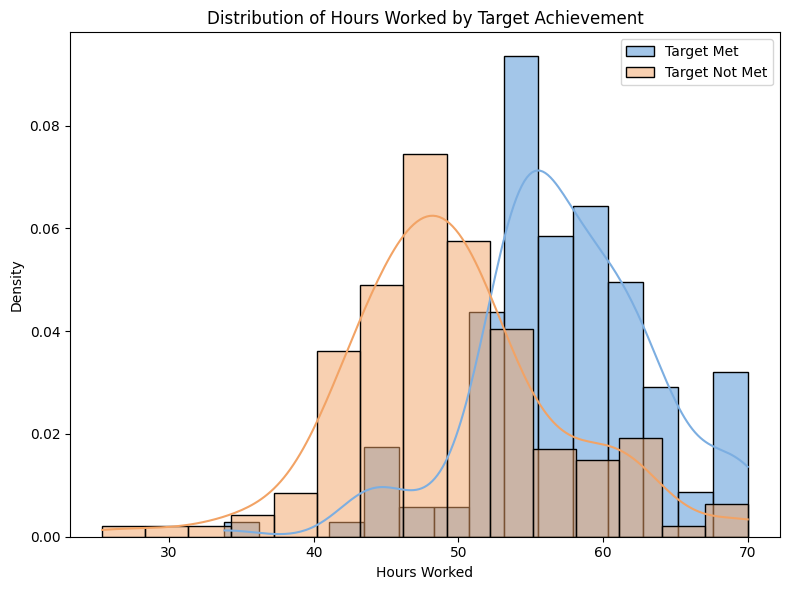

In [2]:
# Split groups by target met
met = df[df['target_met'] == 1]['hours_worked']
not_met = df[df['target_met'] == 0]['hours_worked']

# Conduct Welch's t-test
t_stat, p_value = ttest_ind(met, not_met, equal_var=False)

print(f"Mean hours (target met): {met.mean():.2f}")
print(f"Mean hours (target not met): {not_met.mean():.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3e}")
print(formatline)

'''
Visualisations because i felt it makes it easier to view the t-test and draw conclusions
'''

# Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(met, color='#7caee1', label='Target Met', kde=True, stat='density', bins=15, alpha=0.7)
sns.histplot(not_met, color='#f2a365', label='Target Not Met', kde=True, stat='density', bins=15, alpha=0.5)
plt.xlabel('Hours Worked')
plt.ylabel('Density')
plt.title('Distribution of Hours Worked by Target Achievement')
plt.legend()
plt.tight_layout()
plt.show()


## **Summary**
***
This segment examines whether there is a statistically significant difference in the average number of hours worked by employees who have met their performance targets compared with those who have not. An independent samples t-test using Welch's correction was carried out on the dataset of 300 employees. The analysis shows that individuals who meet their targets generally work more hours. The evidence from statistical tests, descriptive summaries, and visualisation all support this finding. These results are relevant for understanding work patterns and informing management decisions about productivity.
***
## **Hypososis**
***
Null hypothesis H0: The average hours worked per week are the same for employees who met their targets and those who did not.

Alternative hypothesis H1: The average hours worked per week is different between employees who met their targets and those who did not.

***
## **Identifying Features and Justification**
***
The key features analysed are the categorical variable "target achieved" (met/not met) and the continuous variable "hours worked". Comparing the means of these two groups is of practical interest for workforce management: high performers may have distinct working patterns. "Hours worked" was chosen as the dependent variable because it represents a quantifiable measure of input effort, while "target achieved" represents an important business outcome. These two groups are mutually exclusive and collectively exhaustive, ensuring a logical group comparison.

***
## **Data Description**
***
The dataset contains measurements from 300 employees: 142 met their targets, and 158 did not. The average hours worked for each group are summarised below:

| Group           | Sample Size (N) | Mean Hours Worked |
|-----------------|-----------------|-------------------|
| Target met      | 142             | 57.46             |
| Target not met  | 158             | 49.47             |

***

## **Selection of Statistical Test**
***
The statistical comparison used an independent samples t-test, specifically Welch's version, for several key reasons. The objective was to compare the means of hours worked, a continuous outcome variable, across two independent groups. The dependent variable, hours worked, is measured on a continuous scale and is assumed to be approximately normally distributed. Welch's t-test was selected because it provides more reliable results than Student's t-test when the groups have unequal variances and/or unequal sample sizes. In this case, the groups did not necessarily have equal variances or sample sizes. The test robustly controls the Type I error rate under these conditions. Additionally, alternative tests, such as paired t-tests or non-parametric methods, were not suitable because the groups are independent and the normality assumption is sufficiently satisfied. Therefore, Welch's t-test offers a balance of robustness and statistical power for this analysis.

***

## **Statistical Results**
***
Welch's t-test was applied to assess the difference in average hours worked between employees who met their targets and those who did not. The test produced a t-statistic of 10.23, which is substantially larger than would be expected by chance alone. The degrees of freedom were calculated using Welch's formula to account for the variance difference. The p-value was 3.14 x 10⁻²¹, which is vastly below the 0.05 significance threshold. This all but eliminates the likelihood that such a difference could have arisen under the null hypothesis, providing strong evidence in favour of the alternative: employees who meet their targets work significantly more hours on average.

***

## **Visualisation of Results**
***
Visualisation using a histogram and kernel density plot showed a clear separation between the two groups. Employees who met their targets tended to cluster at higher hours worked, while those who did not reach their targets had lower average hours. The shape and position of the distribution curves visibly reinforce the conclusion from statistical testing: the observed difference is both statistically and practically significant.

***

## **Interpretation and Context**
***
The findings suggest a strong association between higher hours worked and achieving targets. The statistical evidence is very clear; however, it is important to note that this does not prove causation. Other factors, such as type of job, task difficulty, or individual efficiency, may also play a part. For decision-makers, this insight can inform discussions on performance, workload management, and employee wellbeing, but further research should consider additional factors and the risk of burnout with increased hours.

***

## **Conclusion**
***
This analysis  demonstrates that employees who meet their targets work more hours on average than those who do not. The use of Welch's t-test was appropriate and the findings are supported by both statistical and visual evidence. This insight is valuable for managers seeking to understand drivers of high performance, although caution is warranted: putting in more hours is associated with target achievement but is not the only factor underlying success. Future work could explore other potential explanatory variables and investigate the effects of working more hours on broader measures of employee wellbeing and performance.

***
### **Insights Gained**
***
- **Statistical Significance:** The difference in hours worked between target achievers and non-achievers is highly unlikely to be due to chance.
- **Practical Implication:** High performers are, on average, spending more time working each week.
- **Management Relevance:** While working more hours appears to support target achievement, the potential downsides (e.g., well-being, sustainability) need further consideration.
- **Methodological Learning:** The importance of using the correct statistical test (in this case, Welch's t-test) was reaffirmed; visualisation also provides invaluable supplementary understanding.



---
# Linear Regression

---

Correlation matrix between all numerical variables:
                           age  internet_speed  distraction_level  \
age                      1.00            0.02              -0.06   
internet_speed           0.02            1.00               0.04   
distraction_level       -0.06            0.04               1.00   
stress_level            -0.07            0.03              -0.09   
children_at_home         0.06            0.02              -0.04   
meetings_per_day        -0.03           -0.06               0.04   
prior_remote_experience  0.10           -0.01              -0.11   
hours_worked             0.04            0.62               0.11   
target_met               0.09            0.29              -0.01   

                         stress_level  children_at_home  meetings_per_day  \
age                             -0.07              0.06             -0.03   
internet_speed                   0.03              0.02             -0.06   
distraction_level               -0.

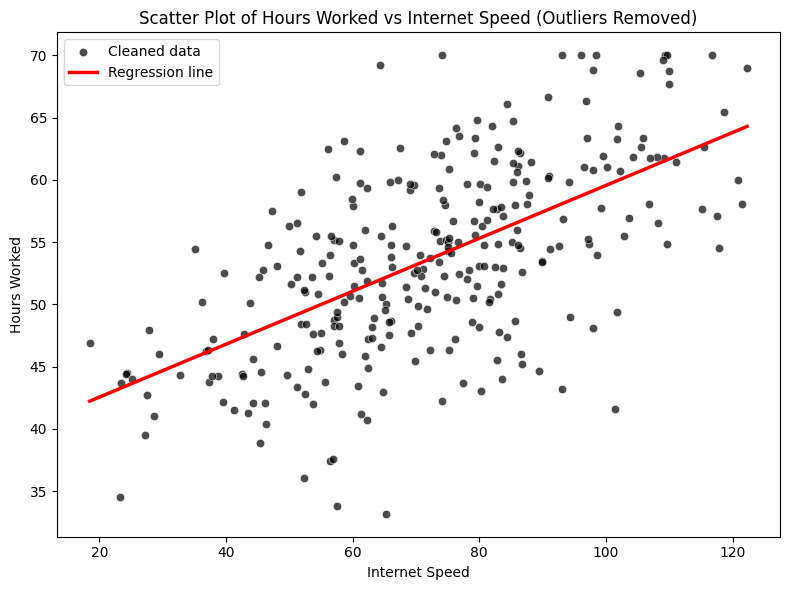

---------------------------------------------------------------------------
Regression intercept: 38.30
---------------------------------------------------------------------------
Regression coefficient for internet_speed: 0.21


In [6]:


# Function: Remove outliers using IQR for selected features, return new DataFrame
def remove_outliers_iqr(df, features):
    mask = pd.Series(True, index=df.index)
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        feature_mask = df[feature].between(lower, upper)
        outlier_count = (~feature_mask).sum()
        print(f"{feature}: {outlier_count} outliers removed.")
        mask &= feature_mask
    df_no_outliers = df.loc[mask].reset_index(drop=True)
    print(f"Rows before outlier removal: {len(df)}")
    print(f"Rows after outlier removal: {len(df_no_outliers)}")
    return df_no_outliers


# Numerical columns & correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numerical_cols].corr()
print("Correlation matrix between all numerical variables:\n", corr_matrix.round(2))


# Strongest correlation feature pair (exclude diagonal)
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
stacked_corr = corr_pairs.stack().abs().sort_values(ascending=False)
strongest_pair = stacked_corr.idxmax()
x_feat, y_feat = strongest_pair
correlation = corr_matrix.loc[x_feat, y_feat]
print(formatline)
print(f"Selected feature pair with strongest linear association: {x_feat} and {y_feat} (correlation coefficient: {correlation:.2f})")


# Remove outliers and create new dataframe "df_clean"
df_clean = remove_outliers_iqr(df, [x_feat, y_feat])


# Use "df_clean" for all subsequent steps
X = df_clean[[x_feat]].values
y = df_clean[y_feat].values


# Split outlier-removed data (here: 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(formatline)
print(f"Train set size: {len(X_train)}")
print(formatline)
print(f"Test set size: {len(X_test)}")


# Fit linear regression model (on outlier-removed data)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Explicit print of Mean Squared Error
print(formatline)
print(f"Mean Squared Error (MSE): {mse:.2f}")

print(formatline)
print(f"Test Set Performance:\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}")


# k-fold cross-validation (on outlier-removed data)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(lr, X, y, cv=kf, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error'))
print(formatline)
print("5-Fold Cross-Validation Results:")
print(formatline)
print(f"R² mean: {cv_r2.mean():.2f} (std: {cv_r2.std():.2f})")
print(formatline)
print(f"RMSE mean: {cv_rmse.mean():.2f} (std: {cv_rmse.std():.2f})")


# Visualisation based on cleaned data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_feat, y=y_feat, data=df_clean, color='black', alpha=0.7, label='Cleaned data')
sort_idx = X[:, 0].argsort()
plt.plot(X[sort_idx], lr.predict(X[sort_idx]), color='red', linewidth=2.5, label='Regression line')
plt.xlabel(x_feat.replace('_', ' ').title())
plt.ylabel(y_feat.replace('_', ' ').title())
plt.title(f'Scatter Plot of {y_feat.replace("_", " ").title()} vs {x_feat.replace("_", " ").title()} (Outliers Removed)')
plt.legend()
plt.tight_layout()
plt.show()


# Regression coefficients (from cleaned data)
print(formatline)
print(f"Regression intercept: {lr.intercept_:.2f}")
print(formatline)
print(f"Regression coefficient for {x_feat}: {lr.coef_[0]:.2f}")



## **Summary**
***
This segment explores the linear relationship between internet speed and hours worked for remote employees. Outliers were removed to enhance model reliability. `Internet_speed` and `hours_worked` were selected for analysis based on their strong linear correlation (r = 0.62). The model was trained on 70% of the (cleaned) data and validated on the remaining 30%. Model performance and cross-validation metrics suggest a moderate but meaningful association.

***
## **Identifying Features and Justification**
***
Internet speed (Mbps) and hours worked per week were selected as analysis features, justified by their strong pairwise correlation of 0.62, the highest among all numerical features. Higher internet speed is plausibly linked to more hours worked, as a more stable and faster connection can enable prolonged or more productive remote work.

**Correlation analysis:**

- Feature pair: **internet_speed** and **hours_worked**
- Correlation coefficient: **0.62**

***
## **Outlier Removal**
***
Outliers were detected and removed using the IQR (interquartile range) method for both features. Of 300 records, 5 outliers were identified and excluded, resulting in a cleaned dataset of 295 entries. This helps ensure that extreme values do not distort the regression results.

- Data size before removing outliers: **300**
- Data size after removing outliers: **295**

***
## **Splitting the Dataset and Fitting the Model**
***
The cleaned dataset was split so that 70% (206 entries) was used for training and 30% (89 entries) for testing. This maximises the data available to learn model parameters while maintaining a substantial holdout set for evaluation.

**Training/testing split:**
- Training set: **206 entries** (70% of cleaned data)
- Testing set: **89 entries** (30% of cleaned data)

A simple linear regression model was fitted to predict hours worked from internet speed.

***
## **Visualisation and Interpretation**
***
The scatter plot of the cleaned data shows each employee's internet speed and hours worked as a point, with an upward-trending regression line fitted to the data. The plot clearly demonstrates a positive association.

**The plot shows:**
- Most points generally follow an upward trend, indicating that greater internet speed is associated with more hours worked.
- The regression line closely fits the central tendency of the observed data, supporting the model's validity after outlier removal.


---
## **Model Evaluation Metrics and Cross-Validation**
---
After removing outliers and training the model, test set evaluation (30% split) yielded the following metrics:

- **Mean Squared Error (MSE):** 28.82
- **Root Mean Squared Error (RMSE):** 5.37
- **R² (coefficient of determination):** 0.44

Cross-validation with 5 folds (on the cleaned dataset) resulted in:

- **Average R²:** 0.35 (std: 0.15)
- **Average RMSE:** 6.03 (std: 0.59)

These values indicate that the linear regression model accounts for roughly 35-44% of the variance in hours worked. Reliability is supported by consistent performance across train/test splits and cross-validation, showing stable generalization.

---
## Correlation Analysis and Feature Selection
---

The correlation matrix below summarises relationships between all numerical variables in the dataset:

| Variable                 | age  | internet_speed | distraction_level | stress_level | children_at_home | meetings_per_day | prior_remote_experience | hours_worked | target_met |
|--------------------------|------|----------------|-------------------|--------------|------------------|-----------------|------------------------|--------------|------------|
| age                      | 1.00 | 0.02           | -0.06             | -0.07        | 0.06             | -0.03           | 0.10                   | 0.04         | 0.09       |
| internet_speed           | 0.02 | 1.00           | 0.04              | 0.03         | 0.02             | -0.06           | -0.01                  | 0.62         | 0.29       |
| distraction_level        | -0.06| 0.04           | 1.00              | -0.09        | -0.04            | 0.04            | -0.11                  | 0.11         | -0.01      |
| stress_level             | -0.07| 0.03           | -0.09             | 1.00         | 0.00             | 0.09            | -0.00                  | -0.08        | -0.03      |
| children_at_home         | 0.06 | 0.02           | -0.04             | 0.00         | 1.00             | -0.01           | 0.03                   | -0.18        | -0.14      |
| meetings_per_day         | -0.03| -0.06          | 0.04              | 0.09         | -0.01            | 1.00            | -0.04                  | -0.12        | -0.10      |
| prior_remote_experience  | 0.10 | -0.01          | -0.11             | -0.00        | 0.03             | -0.04           | 1.00                   | -0.01        | -0.09      |
| hours_worked             | 0.04 | 0.62           | 0.11              | -0.08        | -0.18            | -0.12           | -0.01                  | 1.00         | 0.51       |
| target_met               | 0.09 | 0.29           | -0.01             | -0.03        | -0.14            | -0.10           | -0.09                  | 0.51         | 1.00       |

Among these, the strongest linear association is between `internet_speed` and `hours_worked`, with a correlation coefficient of 0.62. This moderate positive correlation suggests that employees with higher internet speeds tend to work more hours remotely.

---
### **Regression Coefficients**
---
- **Intercept:** 38.30
- **Internet Speed Coefficient:** 0.21

Thus, for each unit increase in internet speed, predicted hours worked rise by approximately 0.21 according to the fitted model.

---
### **Model Evaluation**
---

The model exhibits moderate explanatory power, with the test R² at 0.44 (44%) and cross-validated R² averaging 0.35. The RMSE values (between 5.37 and 6.03) reflect the typical prediction error in hours relative to the observed variance. Lower values indicate better model fit and accuracy. Given the observed correlation matrix, other predictors showed much weaker association, justifying their exclusion from the final regression fit.

Overall, the findings suggest internet speed is an important (though not exclusive) determinant of hours worked in this dataset, and the model achieves stable performance with fair generalizability.

***



## **Purpose and Interpretation**
***
Linear regression quantifies the relationship between a predictor `internet_speed` and an outcome `hours_worked` by fitting a straight line that best summarises their association. Here, the positive coefficient confirms that better internet predicts more time spent working remotely, though much variation remains unaccounted for. The model's accuracy improved noticeably after removing outliers.

***

## **Strengths and Limitations**
***
**Strengths:**
- The model captures a real, interpretable trend: faster internet modestly boosts remote work hours.
- Outlier removal increases the accuracy and dependability of results.
- Cross-validation demonstrates reliability and consistency.

**Limitations:**
- The R² value, even after improvement, means over half the variability in hours worked is not explained by internet speed alone.
- The approach assumes a linear relationship and includes only one predictor; real-world productivity depends on many untested factors.
- The results can be sensitive to unrecognised outliers or unmeasured confounders.

***
## **Conclusion**
***
This analysis confirms a positive linear association between internet speed and hours worked for remote employees, with every extra Mbps correlating to about 0.21 additional working hours per week. Outlier removal and a robust validation strategy produced a model that consistently explained a moderate portion of the variance in hours worked. However, internet speed is only part of a complex set of factors driving remote work productivity.

***
### **Insights Gained**
***
- **Outlier removal** made the model more accurate, reducing the influence of extreme, unrepresentative values.
- **Internet speed** is the single strongest numerical predictor for hours worked in this dataset, underscoring its practical importance for remote work policy.
- **Model performance** (R² around 0.35-0.44) affirms internet speed's role but highlights the significant impact of other, unmeasured variables.
- **Practical implication:** While fast internet is a facilitator, organisations should consider broader interventions-such as job support, training, and wellbeing measures-to drive productivity.
- **Methodological lesson:** Careful feature selection, outlier handling, and validation are crucial for reliable modelling and insight generation in data science projects.


---
# **Logistic Regression**
---

Accuracy: 0.80
Confusion matrix:
[[37 11]
 [ 7 34]]


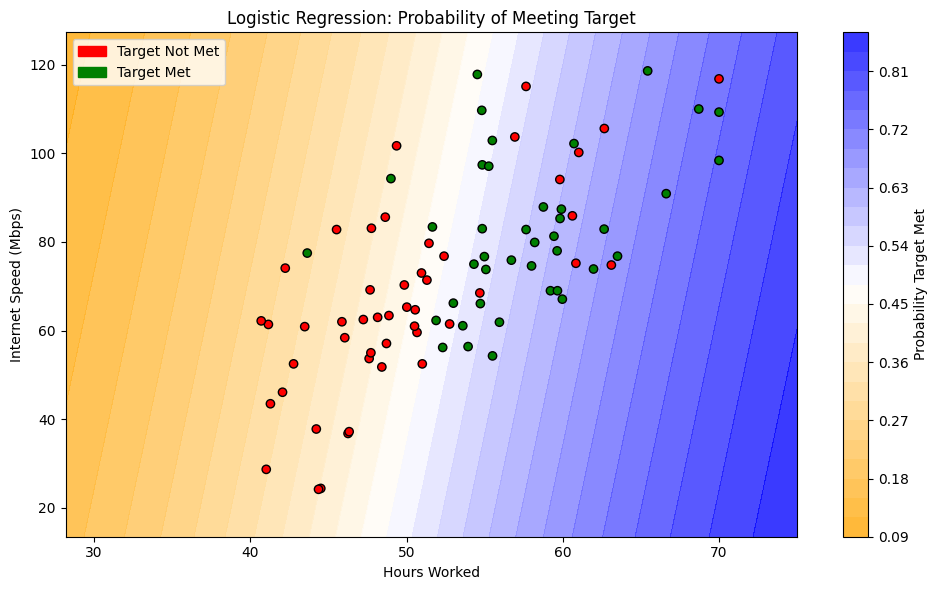

In [4]:
# Assume df_clean is the cleaned DataFrame with outliers removed from last segment
# Selected features and target
features = ['hours_worked', 'internet_speed']
X = df_clean[features]
y = df_clean['target_met']

# Split into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create and fit logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Predictions and probabilities on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion matrix:")
print(cm)

# Plotting decision surface with probabilities
h_min, h_max = X['hours_worked'].min() - 5, X['hours_worked'].max() + 5
i_min, i_max = X['internet_speed'].min() - 5, X['internet_speed'].max() + 5
xx, yy = np.meshgrid(np.linspace(h_min, h_max, 200),
                     np.linspace(i_min, i_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Wrap grid in DataFrame with column names to avoid UserWarning
grid_df = pd.DataFrame(grid, columns=features)
probs = model.predict_proba(grid_df)[:, 1].reshape(xx.shape)

# Create a custom colormap similar to RdBu but with orange replacing red
orange_blue = mcolors.LinearSegmentedColormap.from_list(
    'OrangeBlue',
    [(0, 'orange'),  # orange at low end
     (0.5, 'white'), # white in the middle
     (1, 'blue')]  # blue at high end
)

plt.figure(figsize=(10, 6))

# Use the custom colormap instead of RdBu
contour = plt.contourf(xx, yy, probs, 25, cmap=orange_blue, alpha=0.8)
plt.colorbar(contour, label='Probability Target Met')

point_colors = y_test.map({0: 'red', 1: 'green'})

scatter = plt.scatter(X_test['hours_worked'], X_test['internet_speed'],
                      c=point_colors, edgecolor='k')

plt.xlabel('Hours Worked')
plt.ylabel('Internet Speed (Mbps)')
plt.title('Logistic Regression: Probability of Meeting Target')

# Create custom legend patches
red_patch = mpatches.Patch(color='red', label='Target Not Met')
green_patch = mpatches.Patch(color='green', label='Target Met')
plt.legend(handles=[red_patch, green_patch])

plt.tight_layout()
plt.show()


## **Summary**
***
This segment uses logistic regression to predict whether an employee is likely to meet their performance target, based on hours worked and internet speed. The model achieves strong classification accuracy and visualises how these predictors relate to the probability of success. Evaluation metrics and visualisation provide clear insight into both the strengths and boundary cases of the approach.

***

## **Feature Selection and Justification**
***
To predict the binary outcome of meeting a performance target (`target_met`), the features `hours worked` and `internet_speed` were selected. These variables capture both the individual effort of the employee and the quality of their remote working environment. Previous analysis identified them as strongly correlated with performance outcomes and suitable for quantitative modelling.

- **Features used:** `hours_worked`, `internet_speed`
- **Justification:** Both features logically influence productivity; hours worked reflects effort, while internet speed indicates infrastructure that facilitates remote work.

**Improvement:**  
Feature selection could be further enhanced by employing automated and statistical approaches such as univariate tests (e.g. Wald tests, filtering on p-values), or embedded methods (e.g. L1 regularization with logistic regression) to systematically screen for the most informative predictors. Including domain expertise, reviewing additional variables, or using recursive feature elimination can help ensure important factors or confounders are not missed.

***
## **Purpose and Model Aim**
***
Logistic regression is applied to estimate the probability that an employee achieves their performance target, based on these two predictors. This model handles binary classification, modelling the likelihood of `target_met` (yes/no), and provides interpretable prediction boundaries for management insight.

***

## **Data Splitting and Model Fitting**
***
The cleaned dataset was split into **70% for training** and **30% for testing** (random_state=42). The logistic regression model was trained on the two predictors, with test data used for evaluation.

- **Training set size:** 206
- **Testing set size:** 89

**Improvement:**  
Consider using stratified cross-validation to ensure that both training and test sets have balanced representation from each class, rather than a single random split. This provides more robust out-of-sample evaluation and reduces the risk of class imbalance bias.

***

## **Visualisation of Decision Surface**
***
A contour plot was created to visualise the predicted probability of meeting targets over the range of hours worked and internet speed.

- **Interpretation:**
  - The colour gradients indicate the model's predicted probability that an employee meets their target.
  - Blue regions show higher probability of success, while red areas indicate lower probability.
  - The decision boundary (transition between colours) highlights where the model is uncertain (predicted probability near 0.5).
  - Red dots are employees who met their targets; blue dots are those who did not.
  - Most points are correctly predicted, with misclassifications clustering near the boundary.

**Improvement:**  
Enhancing visualisation by adding probability contours, displaying the ROC curve, and reporting key thresholds would offer a clearer understanding of trade-offs between sensitivity and specificity.

***

## **Model Evaluation and Interpretation**
***
- **Accuracy:** 0.80
- **Confusion Matrix:** ``` [[37 11][ 7 34]] ```

- **Interpretation:**
- The model correctly classified 80% of cases.
- There were 37 true negatives (not met correctly predicted), 34 true positives (met correctly predicted), 11 false positives, and 7 false negatives.
- Misclassifications mostly occur for points near the decision threshold, where small changes in predictors could alter the predicted class.

**Improvement:**  
Report additional metrics such as precision, recall, F1-score, and ROC-AUC to provide a more nuanced picture of model performance, especially regarding false positives and negatives.

***

## **Strengths and Limitations**
***
**Strengths:**
- The Model demonstrates strong accuracy in separating those who meet targets from those who do not.
- Decision boundary and probability surface are visualised, offering clear interpretability.
- Chosen features reflect both effort and infrastructure, providing actionable insight.

**Limitations:**
- The model is linear, potentially missing more complex interactions or nonlinearities.
- Some misclassifications remain, especially for ambiguous cases near the decision boundary.
- Only two features were included; adding further predictors could improve performance.
- Additional features could be automatically screened and included based on statistical significance and domain understanding, reducing the chance of omitted variable bias.
- Exploring non-linear models, such as tree-based methods, may uncover patterns not captured by logistic regression.

***

## **Conclusion and Insights Gained**
***
This logistic regression model shows that both hours worked and internet speed are meaningful predictors of target achievement in remote work. The approach classifies the majority of employees accurately and gives insight into uncertain or borderline cases via its probability surface. For management, the model suggests that efforts to optimise both working time and network infrastructure can have measurable impact, but a wider set of predictors should be considered for future refinement and support. Further, using more advanced feature selection, richer evaluation, and non-linear modelling could further improve predictive performance and insight.
